# **Gamma Correction (감마 보정)**

## **1. Gamma Correction이란?**

- 개요
    - 감마(Gamma)
        - 디스플레이에 입력되는 신호의 밝기(Gray Level)와 화면상에 나타나는 영상의 휘도 간 상관 관계를 결정하는 수치
        - 감마값에 따라 같은 화면이라도 표현되는 밝기 톤의 차이가 생김
            - Gamma < 1: 중·저계조 영역에서 화면이 좀 더 밝게 표현됨
            - Gamma = 1: 입력과 출력의 밝기가 같음
            - Gamma > 1: 중·저계조 영역에서 화면이 좀 더 어둡게 표현됨
    - 감마 보정(Gamma Correction)
        - 비디오 카메라, 컴퓨터 그래픽 등에서 비선형 전달 함수(nonlinear transfer function)를 사용하여 빛의 강도(intensity) 신호를 비선형적으로 변형하는 것
        - 감마 부호화(gamma encoding)라고도 함
        - 255가 최대값이면 128은 이의 절반의 밝기를 나타내야 할것같지만 비선형 전달함수를 사용해서 빛의 강도를 비선형적으로 변형하기 때문에 잘 맞지 않음
- 목적
    - 인간 시각의 비선형성에 맞춰 정보를 부호화하는 것
        -인간 시각은 그 어떤 카메라보다 명암차이를 매우 잘 구별하고, 색상, 해상도 차이에 민감함
        - 특히 사람의 눈은 컴퓨터가 처리하는 밝기와 다르게 반응하기 때문에 어두운곳은 0, 밝은곳을 255로 아무 보정 없이 매칭하게 되면 사람의 눈은 부자연스럽게 느끼게 됨
        - 색상이 변화하는 민감한 부분의 데이터를 보다 효율적으로 압축 전달하기 위해 개발됨
        - 정보 표현량 안에서 선형적으로 빛의 밝기를 기록한다면 사람의 눈이 보다 민감하게 반응하는 어두운 부분에서 밝기가 변할 때 posterization 이 발생하므로 비선형적으로 부호화해서 어두운부분을 더 자세히 기록하는 것(인지민감도)
    - 예전 CRT 모니터의 비선형적 특징 때문에 감마 보정을 한 뒤에 모니터에 나타내야 비로소 정확한 색상이 나타났었음

- 필요한 라이브러리 가져오기

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

- 실습용 데이터 복사하기

In [2]:
# Google Drive Mount
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [9]:
!cp '/gdrive/My Drive/Resources/lenna.png' .

- 감마 값 입력

In [10]:
g = float(input("감마 값 : "))

감마 값 : 0.4


- 감마 보정 적용

In [11]:
img = cv2.imread("./lenna.png")
out = img.copy()
out = img.astype(np.float)
out = ((out / 255) ** (1 / g)) * 255
out = out.astype(np.uint8)

<ipython-input-11-9db501817337>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out = img.astype(np.float)


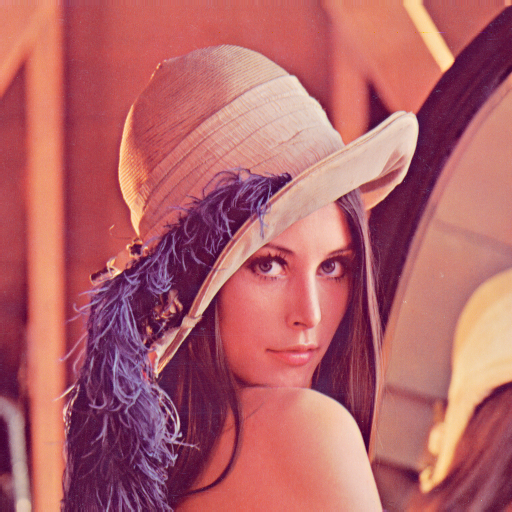

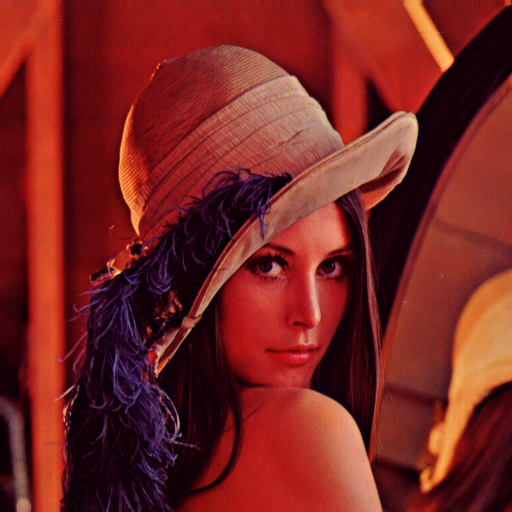

In [13]:
cv2_imshow(img)
cv2_imshow(out)